
#Introdução ao scikit-learn metrics
-------------------------------------------------
Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html
-------------------------------------------------

### Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
warnings.filterwarnings("ignore")

### Importando o dataset

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"settebr","key":"71798c39421b8856910ad34ae19ae95f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!mkdir -p data/iris
!unzip iris.zip -d data/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.35MB/s]
Archive:  iris.zip
  inflating: data/iris/Iris.csv      
  inflating: data/iris/database.sqlite  


In [ ]:
df = pd.read_csv("data/iris/Iris.csv",index_col="Id")

### Explorando o dataset

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df.describe()         

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Split do dataset

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Train Test Split

#### Nesta fase separamos o conjunto de dados em Treinamento e Teste, definindo o percentual que utilizaremos para teste e para treino do modelo

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.3,random_state=1)

### Feature Scaling

#### Normaliza valores para media zero e desvio padrão 1


In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)  
X_test_sc = scaler.transform(X_test) 

In [ ]:
df_train = pd.DataFrame(X_train_sc,index=X_train_sc[:,0],columns=X_train.columns)

In [ ]:
display(df_train)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
-0.430106,-0.430106,2.631185,-1.332697,-1.303804
-0.550536,-0.550536,0.769184,-1.165380,-1.303804
0.653762,0.653762,0.303684,0.842430,1.444654
1.015051,1.015051,0.536434,1.065520,1.182896
-1.032255,-1.032255,0.303684,-1.444242,-1.303804
...,...,...,...,...
-1.634404,-1.634404,-1.791068,-1.388470,-1.172925
-0.068817,-0.068817,-1.092817,0.117388,0.004986
-1.032255,-1.032255,0.769184,-1.221152,-1.042046
-1.513975,-1.513975,0.070933,-1.276925,-1.303804


In [ ]:
df_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,4.652363e-16,-8.934652e-17,-1.036208e-16,-6.132661e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.875264e+00,-2.489319e+00,-1.555787e+00,-1.434683e+00
25%,-7.913958e-01,-6.273171e-01,-1.221152e+00,-1.172925e+00
50%,-6.881702e-02,-1.618168e-01,2.847054e-01,1.358648e-01
75%,6.537617e-01,7.691839e-01,7.308854e-01,7.902596e-01
max,2.460209e+00,2.631185e+00,1.734790e+00,1.706412e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cb2a5ecd0>,
      dtype=object)

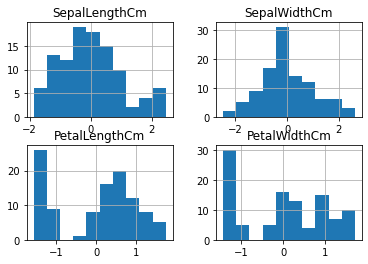

In [ ]:
df_train.hist()

In [ ]:
df_test = pd.DataFrame(X_test_sc,index=X_test_sc[:,0],columns=X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cb23d63d0>,
      dtype=object)

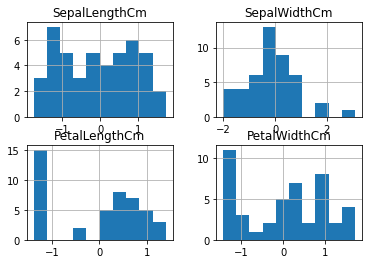

In [ ]:
df_test.hist()

### KNN Model

#### Agora iremos aplicar nossos dados ao algoritmo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test) 

### Avaliando o Algoritmo
##### Analisando e validando os resultados obtidos

#### Métricas implementadas no sklearn

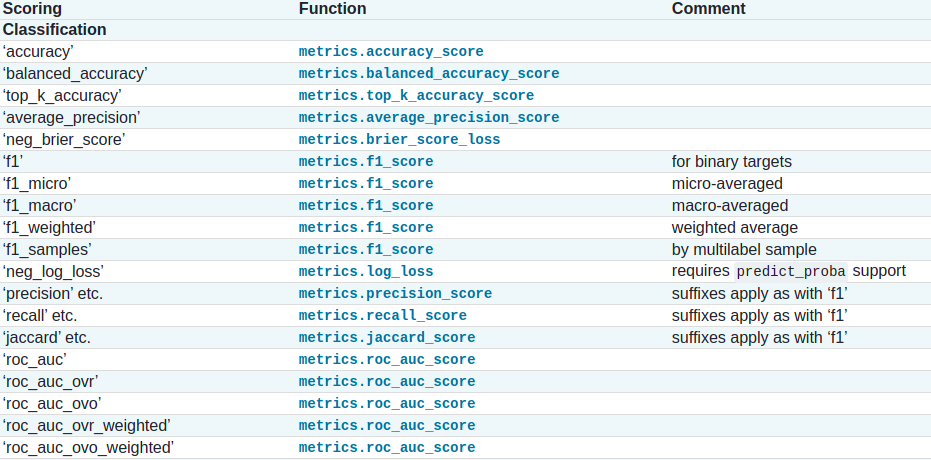

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy on test: ", accuracy_score(y_test, y_pred))  


accuracy on test:  0.9555555555555556


In [ ]:
from sklearn.metrics import balanced_accuracy_score
help(balanced_accuracy_score)

Help on function balanced_accuracy_score in module sklearn.metrics._classification:

balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)
    Compute the balanced accuracy.
    
    The balanced accuracy in binary and multiclass classification problems to
    deal with imbalanced datasets. It is defined as the average of recall
    obtained on each class.
    
    The best value is 1 and the worst value is 0 when ``adjusted=False``.
    
    Read more in the :ref:`User Guide <balanced_accuracy_score>`.
    
    .. versionadded:: 0.20
    
    Parameters
    ----------
    y_true : 1d array-like
        Ground truth (correct) target values.
    
    y_pred : 1d array-like
        Estimated targets as returned by a classifier.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    adjusted : bool, default=False
        When true, the result is adjusted for chance, so that random
        performance would score 0,

In [ ]:
print("balanced accuracy on test: ", balanced_accuracy_score(y_test, y_pred))  


balanced accuracy on test:  0.9558404558404558


In [ ]:
from sklearn.metrics import f1_score

help(f1_score)  


Help on function f1_score in module sklearn.metrics._classification:

f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the F1 score, also known as balanced F-score or F-measure.
    
    The F1 score can be interpreted as a harmonic mean of the precision and
    recall, where an F1 score reaches its best value at 1 and worst score at 0.
    The relative contribution of precision and recall to the F1 score are
    equal. The formula for the F1 score is::
    
        F1 = 2 * (precision * recall) / (precision + recall)
    
    In the multi-class and multi-label case, this is the average of
    the F1 score of each class with weighting depending on the ``average``
    parameter.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    

``'micro'``:
            Calculate metrics globally by counting the total true positives,
            false negatives and false positives.
        
``'macro'``:
            Calculate metrics for each label, and find their unweighted
            mean.  This does not take label imbalance into account.

In [ ]:
print("f1_score on test: ", f1_score(y_test, y_pred,average='macro'))

f1_score on test:  0.9777530589543938


In [ ]:
print("f1_score on test: ", f1_score(y_test, y_pred,average='micro'))

f1_score on test:  0.9777530589543938


In [ ]:
from sklearn.metrics import precision_score
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

In [ ]:
print("precision_score on test: ", precision_score(y_test, y_pred,average="macro"))  


precision_score on test:  0.9791666666666666


In [ ]:
print("precision_score on test: ", precision_score(y_test, y_pred,average="micro"))  


precision_score on test:  0.9777777777777777


In [ ]:
from sklearn.metrics import recall_score

help(recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average != 'binary'``, and their
        ord

In [ ]:
print("recall_score on test: ", recall_score(y_test, y_pred,average="macro"))  


recall_score on test:  0.9777777777777779


In [ ]:
print("recall_score on test: ", recall_score(y_test, y_pred,average="micro"))  


recall_score on test:  0.9777777777777777


In [ ]:
from sklearn.metrics import classification_report

print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


Relatório de classificação: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Loop para gerar testes com diferentes valores de visinho (K)

In [ ]:
from tqdm import tqdm
error = []

for i in tqdm(range(1, 20, 2)):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

100%|██████████| 10/10 [00:00<00:00, 190.38it/s]


### Comparando o Error Rate gerado de valores K diferentes

Text(0, 0.5, 'Mean Error')

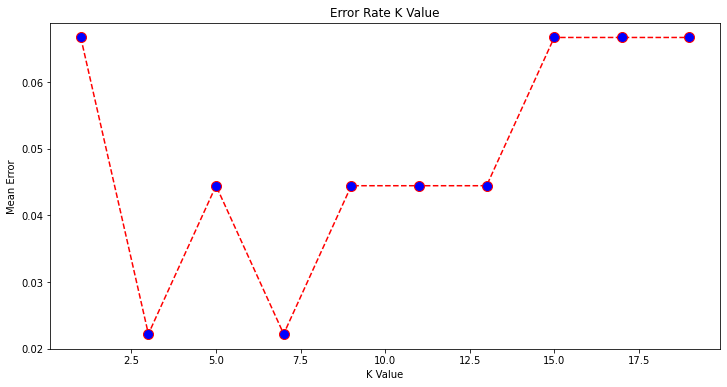

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

### Aplicando melhor parâmetro para K encontrado

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test) 

In [ ]:
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Wine 

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


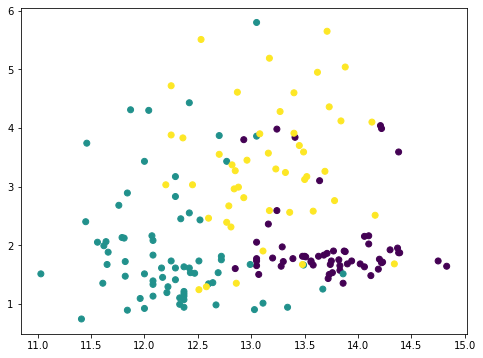

In [ ]:

wine = datasets.load_wine()

print(wine.data.shape)
print(wine.feature_names)

X = wine.data[:, :2]
y = wine.target

plt.figure(2, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
import pandas as pd
from sklearn.model_selection import cross_validate

help(cross_validate)



Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitt

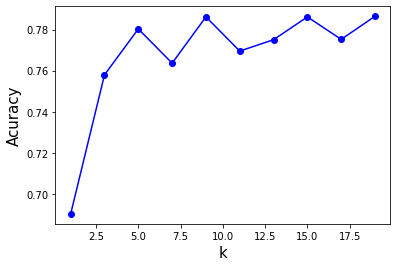

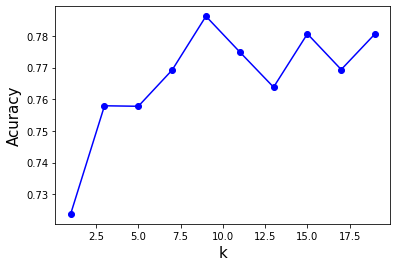

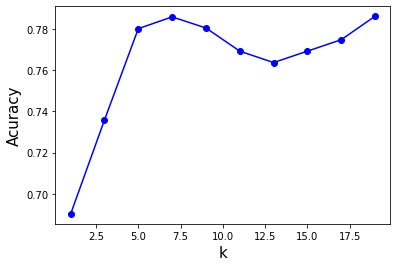

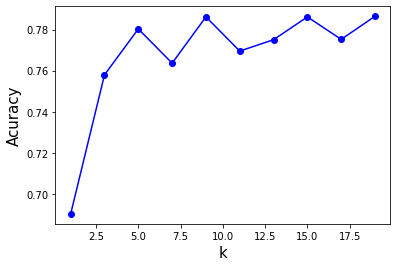

In [ ]:
nkf = 5 # Numero de folds
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
  vk = [] # Armazena os valores de k
  vscore = []
  for k in range(1, 20,2):
      model = KNeighborsClassifier(n_neighbors=k, metric = dist)
      cv = cross_validate(model, X, y, cv=nkf)
      vscore.append(cv['test_score'].mean())
      vk.append(k)

  plt.figure(figsize=(6,4))
  plt.plot(vk, vscore, '-bo')
  plt.xlabel('k', fontsize = 15)
  plt.ylabel('Acuracy', fontsize = 15)
  plt.show(True)

In [ ]:
import threading
threading.active_count()

11

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=10)

k_range = list(range(1, 31))
all_metrics = ['euclidean', 'manhattan', 'chebyshev']
param_grid = dict(n_neighbors=k_range, metric=all_metrics)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
print(knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [ ]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [ ]:
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.40%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,metric="manhattan")

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
y_pred=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 85.19%


In [ ]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return 

Acc teste:  0.8518518518518519
[[17  1  1]
 [ 2 17  2]
 [ 1  1 12]]
None


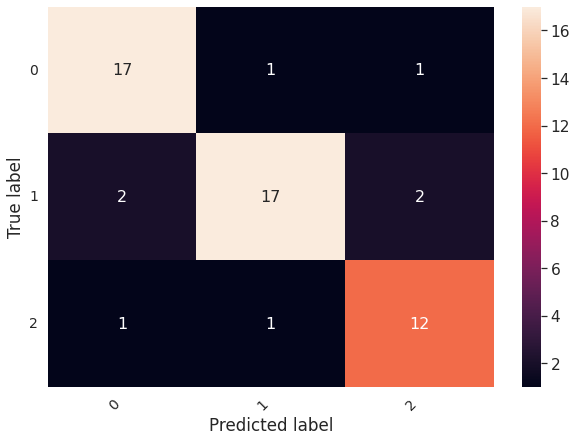

In [ ]:
print("Acc teste: ", accuracy_score(y_test,y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(plot_confusion_matrix(cf,class_names=["0","1","2"]))